# OffensiveEval NB initial work
So the work im gonna do in this notebook is just exploritory and is mostly about getting to grips with the data set and juypyter

So the things im going to try and do in this notebook:
* load in the dataset
* turn the dataset into a document term matrix (dtm)
* train a naive bayes model and evaluate results

After i get these things done i'll try to:
* test out some other models
* experiment with basic tuning for models and vectorizer
* get some graphs into the notebook to compare models
* explore how models work more to understand how to make more accurate

## Part 1

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


In [2]:
path = 'OLIDv1.0/olid-training-v2.0.tsv'
testset = pd.read_table(path, header=None, names=['id','tweet','sub_a','sub_b','sub_c'])

In [3]:
testset.shape

(13240, 5)

In [4]:
testset.head(5)

,id,tweet,sub_a,sub_b,sub_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [5]:
testset.sub_a.value_counts()

NOT    8840
OFF    4400
Name: sub_a, dtype: int64

In [6]:
testset['label_a_num'] = testset.sub_a.map({'NOT':0, 'OFF':1})

In [7]:
testset.head(10)

,id,tweet,sub_a,sub_b,sub_c,label_a_num
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,1
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,0
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH,1
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN,1
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP,1
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN,0
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND,1


In [8]:
x = testset.tweet
y = testset.label_a_num
print(x.shape)
print(y.shape)

(13240,)
(13240,)


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(9930,)
(3310,)
(9930,)
(3310,)


In [12]:
vect = CountVectorizer(stop_words='english', ngram_range=(1, 2), min_df=2)

In [13]:
x_train_dtm = vect.fit_transform(x_train)

In [14]:
x_train_dtm

<9930x13627 sparse matrix of type '<class 'numpy.int64'>'
	with 121026 stored elements in Compressed Sparse Row format>

In [15]:
x_test_dtm = vect.transform(x_test)
x_test_dtm

<3310x13627 sparse matrix of type '<class 'numpy.int64'>'
	with 35958 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [17]:
%time nb.fit(x_train_dtm, y_train)

Wall time: 2.94 ms


MultinomialNB()

In [18]:
y_pred_class = nb.predict(x_test_dtm)

In [19]:
from sklearn import metrics
nb_acc = metrics.accuracy_score(y_test, y_pred_class)
nb_acc

0.7308157099697885

In [20]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1788,  424],
       [ 467,  631]], dtype=int64)

In [21]:
x_test[(y_pred_class==1) & (y_test==0)]

3492                            @USER BONO  IS AN ASSHOLE.
6536     @USER @USER @USER White cops are called racist...
12938    @USER @USER @USER You missed Rachel Maddow's s...
12873    Ababzhah but this whole everyone talking about...
2210     @USER @USER nigga thought it was gone a 44 poi...
                               ...                        
616      @USER She is never been tortured" She was ans ...
676      @USER @USER Liberals own education in this cou...
3167     @USER I think it’s a stupid choice not to put ...
8730     @USER At this point it’s just a money grab... ...
1975     @USER Does she expect a mob in pussy hats shou...
Name: tweet, Length: 424, dtype: object

In [22]:
x_test[(y_pred_class==0) & (y_test==1)]

13103    @USER @USER Why didn't Zac Goldsmith of the fa...
8979     @USER @USER @USER We skewer Sushma Swaraj also...
11552    @USER @USER @USER Could be either. Liberals li...
2308     @USER where did you dig this one from? She is ...
8457     @USER @USER Awww 😥😥😥 CUPCAKES SUCK IT UP. SHE ...
                               ...                        
8788     @USER @USER @USER If any left leaning freak at...
10258    @USER And republicans fall right in line and s...
197                             @USER the owner of my culo
8779     #Kavanaugh can't back out of nomination. He co...
4528     @USER @USER @USER Hah! The fucking Chats!?! ‘O...
Name: tweet, Length: 467, dtype: object

In [49]:
y_pred_prob = nb.predict_proba(x_test_dtm)[:,1]
y_pred_prob

array([[0.71350209, 0.28649791],
       [0.99211177, 0.00788823],
       [0.05490874, 0.94509126],
       ...,
       [0.5162576 , 0.4837424 ],
       [0.90506222, 0.09493778],
       [0.56054717, 0.43945283]])

In [24]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.7376268951932989

# Part 2
Okay so i got the notebook working well and also was able to use the data set and naive bayes.

Now im gonna try some other models so i can compare them, after that might try and look into why the accuracy was so low for NB

In [25]:
from sklearn.linear_model  import LogisticRegression, SGDClassifier
logreg = LogisticRegression(max_iter=10000)
sgdc = SGDClassifier()

In [26]:
%time logreg.fit(x_train_dtm, y_train)

Wall time: 883 ms


LogisticRegression(max_iter=10000)

In [27]:
y_pred_class = logreg.predict(x_test_dtm)

In [28]:
y_pred_prob = logreg.predict_proba(x_test_dtm)[:,1]

In [29]:
log_acc = metrics.accuracy_score(y_test, y_pred_class)

In [30]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.772567334328073

In [31]:
%time sgdc.fit(x_train_dtm, y_train)

Wall time: 105 ms


SGDClassifier()

In [32]:
y_pred_class = sgdc.predict(x_test_dtm)
svm_acc = metrics.accuracy_score(y_test,y_pred_class)

In [33]:
x_train_tokens = vect.get_feature_names()
len(x_train_tokens)

13627

In [34]:
print(x_train_tokens[0:50])

['00', '000', '05', '08', '08 12', '08 18', '09', '09 08', '09 14', '10', '10 20', '10 mile', '10 signs', '10 years', '100', '100 agree', '100 correct', '100 right', '1000', '101', '10th', '10x', '10yrs', '11', '110', '11th', '11th hour', '12', '12 gauge', '13', '13 killers', '1300', '1300 pump', '14', '14 23', '14th', '15', '15 fully', '15 min', '15 minutes', '15 year', '15 years', '150', '16', '17', '17 year', '170', '1776', '18', '180']


In [35]:
print(x_train_tokens[-50:])

['yes mothers', 'yes sick', 'yes talking', 'yes url', 'yes vote', 'yes wrong', 'yes yes', 'yesterday', 'yh', 'yo', 'yoda', 'york', 'york city', 'young', 'young conservatives', 'young dumb', 'young lady', 'young minds', 'young people', 'young woman', 'younger', 'youre', 'youth', 'youth activists', 'youthful', 'youtube', 'youtuber', 'yr', 'yr old', 'yrs', 'yrs ago', 'yrs later', 'yup', 'zealand', 'zero', 'zero accomplishments', 'zero credibility', 'zero evidence', 'zim', 'zionists', 'zoe', 'zombie', 'zombie url', 'zone', 'zones', '너의존재가_기적이야', '너의존재가_기적이야 url', '현재', '현재 gt', '현재 ll']


In [36]:
nb.feature_count_

array([[2., 2., 1., ..., 5., 2., 2.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [37]:
nb.feature_count_.shape

(2, 13627)

In [38]:
OFF_token_count = nb.feature_count_[1,:]
OFF_token_count

array([0., 0., 1., ..., 0., 0., 0.])

In [39]:
NOT_token_count = nb.feature_count_[0,:]
NOT_token_count

array([2., 2., 1., ..., 5., 2., 2.])

In [40]:
tokens = pd.DataFrame({'token':x_train_tokens, 'OFF':OFF_token_count, 'NOT':NOT_token_count})
tokens.head(10)

,token,OFF,NOT
0,00,0.0,2.0
1,000,0.0,2.0
2,05,1.0,1.0
3,08,0.0,6.0
4,08 12,0.0,2.0
5,08 18,0.0,2.0
6,09,1.0,4.0
7,09 08,0.0,2.0
8,09 14,0.0,2.0
9,10,12.0,35.0


In [41]:
tokens.sample(15, random_state=8)

,token,OFF,NOT
5224,hope realize,1.0,1.0
2520,cook county,1.0,2.0
5311,hurt vote,0.0,2.0
199,abortion murder,1.0,1.0
8240,people maga,0.0,3.0
9247,removal,0.0,3.0
2819,dead shooting,1.0,1.0
12744,user wanted,0.0,2.0
10325,splc,0.0,2.0
4503,glorious,1.0,3.0


In [42]:
nb.class_count_

array([6628., 3302.])

In [43]:
tokens['OFF'] = tokens.OFF + 1
tokens['NOT'] = tokens.NOT + 1

In [44]:
tokens['OFF'] = tokens.OFF /nb.class_count_[1]
tokens['NOT'] = tokens.NOT / nb.class_count_[0]
tokens.sample(15, random_state=8)

,token,OFF,NOT
5224,hope realize,0.000606,0.000302
2520,cook county,0.000606,0.000453
5311,hurt vote,0.000303,0.000453
199,abortion murder,0.000606,0.000302
8240,people maga,0.000303,0.000604
9247,removal,0.000303,0.000604
2819,dead shooting,0.000606,0.000302
12744,user wanted,0.000303,0.000453
10325,splc,0.000303,0.000453
4503,glorious,0.000606,0.000604


In [45]:
tokens['OFF_ratio'] = tokens.OFF /tokens.NOT
tokens.sample(15, random_state=40)

,token,OFF,NOT,OFF_ratio
6810,losing mind,0.000909,0.000151,6.021805
11577,uncle,0.001211,0.000604,2.007268
10720,swamp,0.003331,0.001811,1.839996
7457,motions,0.000303,0.000453,0.669089
9916,shape form,0.000303,0.000453,0.669089
12183,user hogg,0.000303,0.000604,0.501817
8933,queen,0.002120,0.001358,1.561209
4659,got knocked,0.000606,0.000302,2.007268
1012,bad antifa,0.000606,0.000302,2.007268
8126,patriotsfight,0.000303,0.000453,0.669089


In [46]:
tokens.sort_values('OFF_ratio', ascending=False)

,token,OFF,NOT,OFF_ratio
1302,bitch,0.021805,0.000302,72.261660
11809,user bitch,0.006360,0.000151,42.152635
5349,idiot,0.011811,0.000302,39.141732
887,asshole,0.004240,0.000151,28.101757
12096,user fuck,0.013931,0.000604,23.083586
...,...,...,...,...
6746,london,0.000303,0.002414,0.125454
2336,conservatives url,0.000303,0.002565,0.118075
12772,user woman,0.000303,0.002565,0.118075
11793,user beautiful,0.000303,0.003168,0.095584


In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

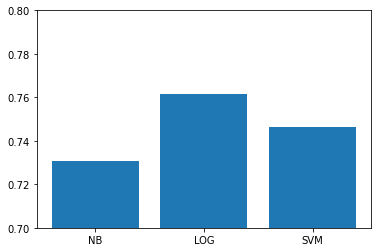

In [48]:
plt.bar(['NB','LOG','SVM'],[nb_acc,log_acc,svm_acc])
plt.ylim(0.7, 0.8)
plt.show